### projet 4 

# segmentation de la clientèle d'un site de Ecommerce #

# LIBRAIRIES

In [130]:
import scipy


import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy import stats

from scipy.stats.pearsonr(res_pca[:,0], res_pca[:,1])

from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


## Importation des données

In [28]:
file="https://raw.githubusercontent.com/JosueAfouda/Segmentation-de-client-le-dans-python/main/Wholesale%20customers%20data.csv"

df= pd.read_csv(file)

In [29]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# consulter la documentation sur les données à fin de comprendre les variables

https://archive.ics.uci.edu/ml/datasets/Wholesale+customer

In [30]:
df["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

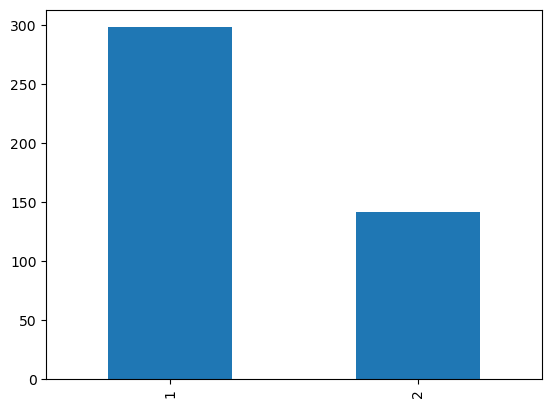

In [31]:
# Type de distribution
df["Channel"].value_counts().plot(kind="bar");

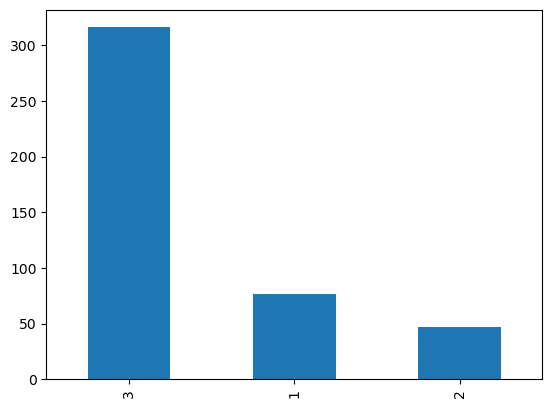

In [32]:
# région des clients
df["Region"].value_counts().plot(kind="bar");

In [33]:
# Quelques changement de nom de variables et modalités

df=df.rename(columns={"Delicassen": "Delicatessen"}) # Delicatessen: épicerie fine

df["Channel"]= df["Channel"].map({1: "HoReCa", 1: "Retail"}) # Retail: vente au détail

df["Region"]= df["Region"].map({1: "Lisbon", 2: "Porto", 3: "Other"}) 

In [34]:
# Table de fréquence de la variable "Region"

df["Region"].value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

donc les marchandises proviennent beaucoup plus d'autre région(316)

In [35]:
# Table de fréquence de fréquence normalisée
df["Region"].value_counts(normalize=True)

Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: Region, dtype: float64

In [36]:
# Stockage des noms des colonnes dans une liste

features= df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [37]:
# Résumé statisque
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Inspection de df 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           298 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [39]:
# Nombres de valeurs manquantes dans df
df.isnull().sum()

Channel             142
Region                0
Fresh                 0
Milk                  0
Grocery               0
Frozen                0
Detergents_Paper      0
Delicatessen          0
dtype: int64

In [40]:
mode=df["Channel"].value_counts().idxmax()
df["Channel"].replace(np.nan, mode, inplace=True)

In [41]:
# Vérification

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


il y'a plus de valeurs manquantes passons maintenant à la visualisation des données

In [46]:
# sauvegarde de df au format csv

df.to_csv("data_processed.csv")

In [48]:
# Importation du fichier "data_processed.csv"

df=pd.read_csv("data_processed.csv" , index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Retail,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


# Visualisation des données #

In [50]:
#  "channel" et  "Region" sont les variables discrètes

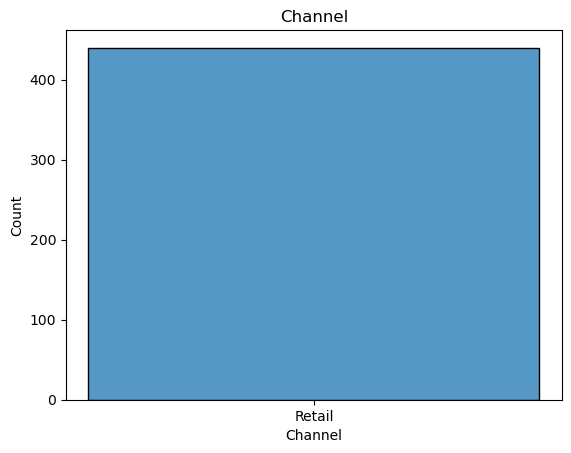

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


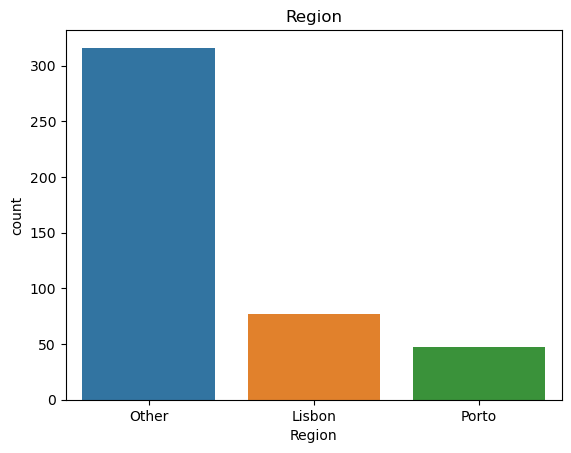

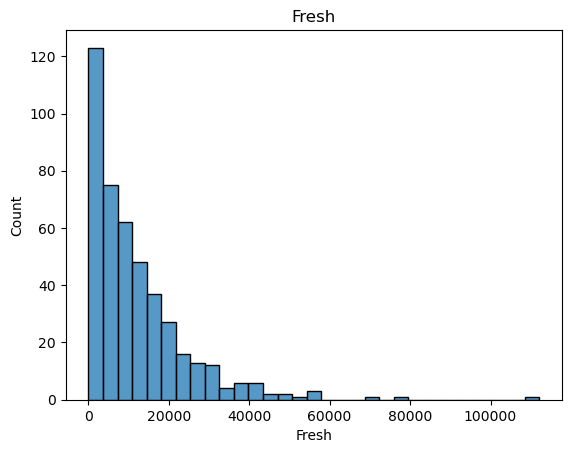

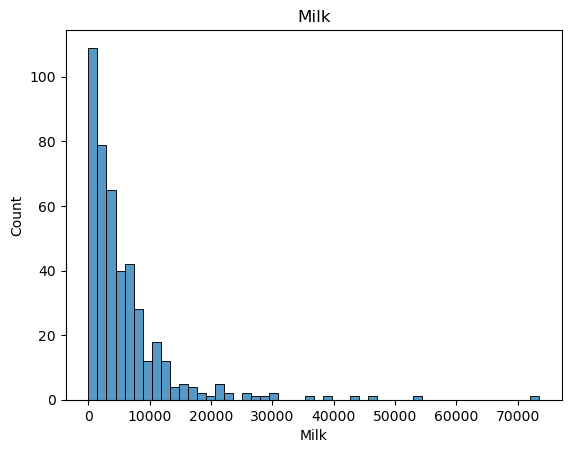

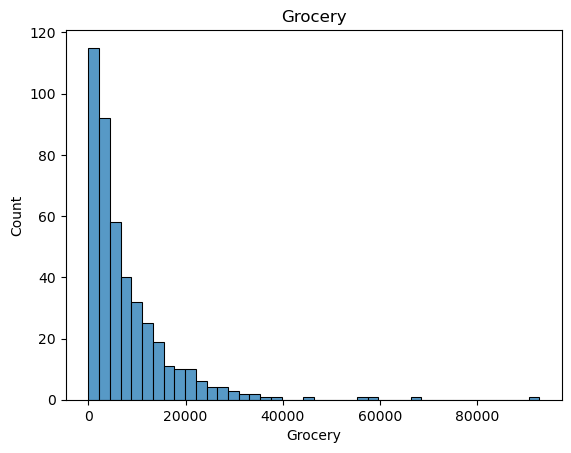

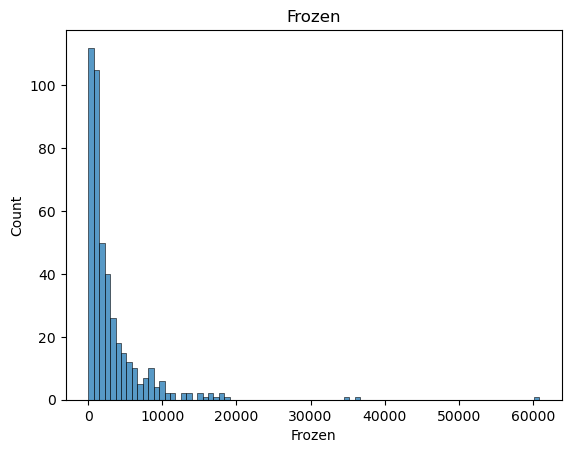

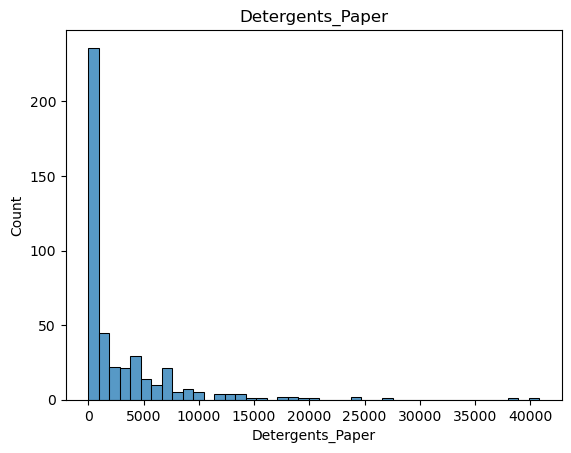

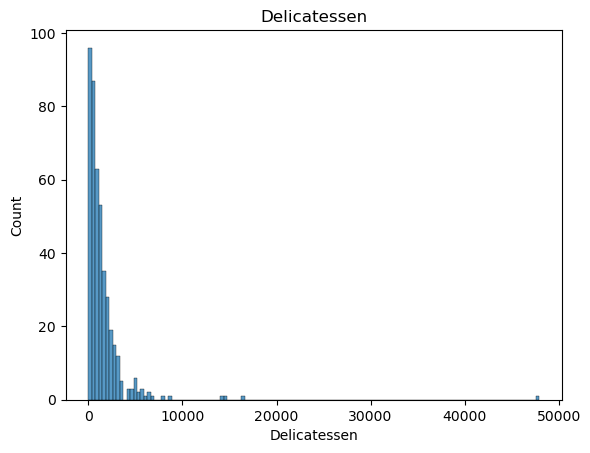

In [49]:
# Diagramme à barre et histogramme
for feature in features:
    
    if (feature == "channel") | (feature == "Region"):
        
        sns.countplot(df[feature]).set_title(feature)
        plt.show()
        
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show();



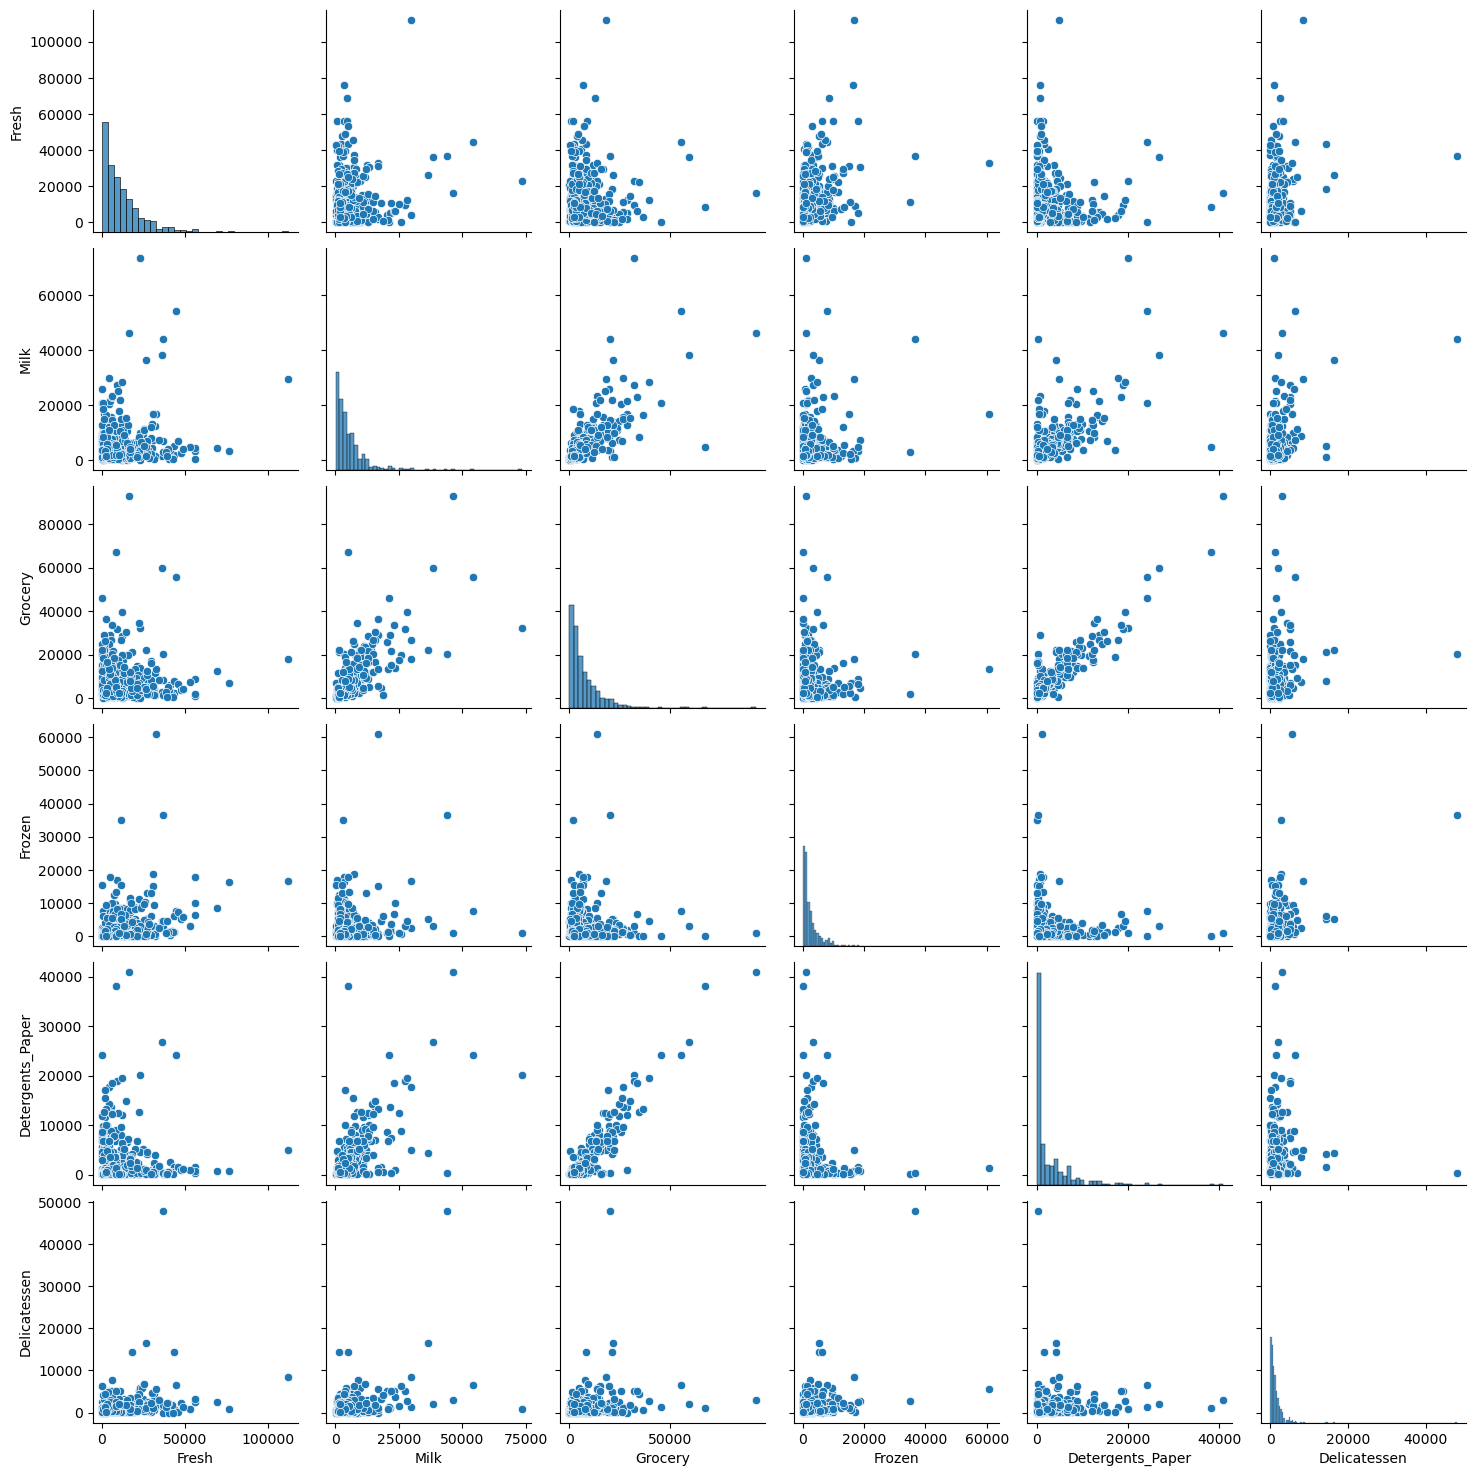

In [51]:
# Matrice de visualisation
sns.pairplot(df);

# Analyse en composantes principales(ACP)


# ACP LINEAIRE #

L' ACP est certainement la technique de réduction de dimensionnalité la plus utilisé.Elle est simple,
facile à implementer et donne de bons résultats.Nous allons réduire les dimensions de la dataframe df en 2 composantes principales
afin de pouvoir visualiser le résultat dans un plan(2D).

In [59]:
# Dataframe des variables numériques de df
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776


on voit bien que les variables "channel" et "Region" sont des variables qualitatives.On va les supprimer

In [61]:
# Dataframe des variables numériques de df

data=df.drop(["Channel" , "Region"], axis=1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


lorsqu'on veut faire l'ACP on doit standardiser les données pour avoir de meilleur résultats.

In [66]:
# standardisation

scaler= StandardScaler()

data= scaler.fit_transform(data)

type(data)

numpy.ndarray

In [67]:
# Affichage de data
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [68]:
# sauvegarde du tableau data
np.save("training_data.npy",data)

In [71]:
#  Applications de l'ACP (2 composantes)

pca= PCA(n_components=2)

res_pca=pca.fit_transform(data)

type(res_pca)

numpy.ndarray

In [72]:
# Affichage du résultat
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

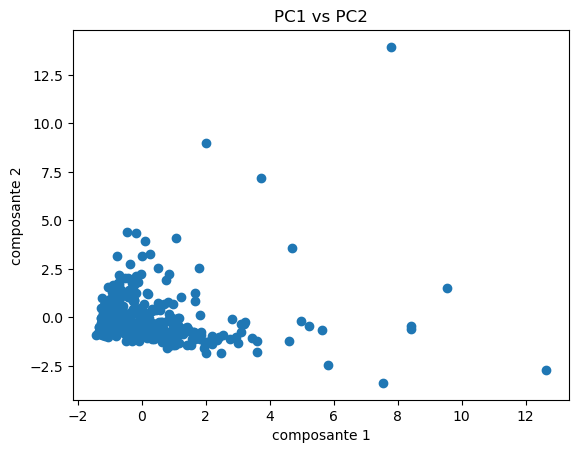

In [73]:
#  Visualisation des composantes principales
plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")
plt.show()

Il y'a pas de corrélation linéaire entre les deux composantes, c'est l'intérêt même de faire l'acp, qui permet de décorreler les variables, donc briser la colinéarité entre les varibles.

In [ ]:
on a appliqué la technique de réduction de dimensionnalité, en passant à une dataframe de 6 variables à 2.

In [99]:
# coefficient de correlation de pearson obtenu après L'ACP

scipy.stats.pearsonr(res_pca[:,0], res_pca[:,1])


PearsonRResult(statistic=-2.3678975447083417e-16, pvalue=1.000000000000096)

le coefficient de correlation est dans un tuple donc si je veux récupérer la première valeur(uniquement le coefficent).
Je fais ceci

In [100]:
scipy.stats.pearsonr(res_pca[:,0], res_pca[:,1])[0]

-2.3678975447083417e-16

In [ ]:
r, p = scipy.stats.pearsonr(res_pca[:,0], res_pca[:,1])
print("The pearson correlation coefficient between price and mileage is:", r)
print("The p-value is:", p)

# ACP non linéaire

L'ACP non linéaire, contrairement à l'ACP linéaire permet de faire une réduction non linéaire de dimensionnalité.Nous utiliserons l'algorithme (Kernel Principal component Analysis (KPCA) de sklearn.

Les noyaux possibles sont: "linear", "poly", "rbf","sigmoîd", "cosine", "precomputed". Si le noyau est "linear" alors on a une ACP normale.

In [101]:
# Chargement des données d'entrainement précédemment sauvegarder: "training_data.npy"

data=np.load("training_data.npy")
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [108]:
# KPCA avec noyau

kpca=KernelPCA(n_components=2, kernel="rbf")

res_kpca_rbf=kpca.fit_transform(data)

type(res_kpca_rbf)

numpy.ndarray

In [110]:
# Affichage du résultat
res_kpca_rbf

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

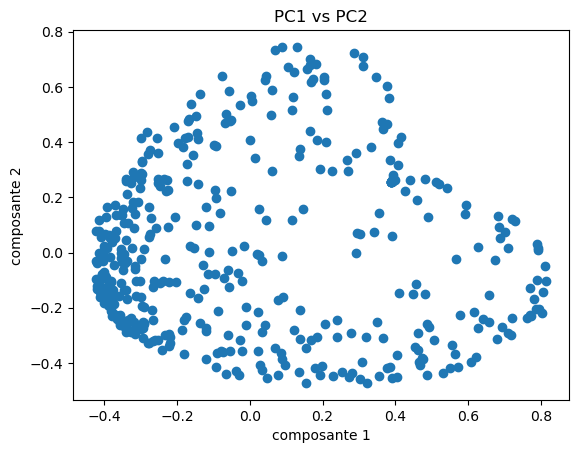

In [111]:
# Visualisation du nuage de points des deux composantes

plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")
plt.show()


In [112]:
# coefficient de correlation de pearson obtenu après KACP(kernel='rbf')
scipy.stats.pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])

PearsonRResult(statistic=2.1467203015212988e-17, pvalue=1.0000000000001332)

In [113]:
# Comparaison des coefficients de pearson

scipy.stats.pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])[0] < scipy.stats.pearsonr(res_pca[:,0], res_pca[:,1])[0]

False

comentaire d'après les calculs  kpca a le plus grand coefficeient de corrélation linéaire, que pca.l
ca veut dire que les deux composants sont le plus corrélés avec l'acp non linéaire que l'ACP linéaire. Mais à vue d'oeil c'est 
l'ACP linéaire qui est le plus corrélés que l'acp non linéaire.

QUE CE SOIT AVEC L'ACP LINEAIRE OU NON LINEAIRE NOUS AVONS VU QUE LES 2 COMPOSANTES NE SONT PAS CORRELEES

Pour la réduction polynomiale(kernel='poly',) n'oublions pas de préciser le degré du polynôme
en utilisant en utilisant l'argument degree au niveau de la fonction KernelPCA(Par exemple degree=2 pour un polynôme du second degré).


In [114]:
# Ajout des composantes principales comme colonne de df
df["x_res_kpca_rbf"] = res_kpca_rbf[:,0]

df["y_res_kpca_rbf"] = res_kpca_rbf[:,1]

In [115]:
# Cinq premières observations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_res_kpca_rbf,y_res_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,Retail,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


# CLUSTERING K-Means AVEC LA METHODE DU COUDE

Dans cette section nous allons implémenter un clustering en utilisant l'algorithme k-means

In [118]:
# Clustering avec Cinq clusters
cluster_model= KMeans(n_clusters=5)
cluster_model.fit(res_kpca_rbf)
clusters=cluster_model.predict(res_kpca_rbf)

In [119]:
# Affichage des clusters
clusters

array([1, 1, 2, 3, 2, 0, 0, 1, 0, 4, 1, 0, 2, 4, 2, 0, 1, 0, 2, 0, 3, 0,
       2, 2, 2, 0, 0, 0, 4, 2, 3, 0, 3, 2, 0, 1, 2, 4, 4, 2, 2, 3, 4, 4,
       1, 4, 4, 2, 1, 4, 0, 0, 2, 1, 3, 0, 2, 4, 0, 1, 1, 2, 1, 4, 0, 2,
       1, 1, 0, 0, 3, 2, 3, 3, 1, 3, 0, 4, 0, 0, 0, 4, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 2, 2, 1, 0, 1, 0, 0, 3, 4, 4, 1, 2, 0, 3, 1, 4, 1, 4,
       0, 4, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 1, 2, 2, 3, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 3, 2, 2, 3, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 4, 3, 1, 4, 1, 0, 3, 4, 1, 4, 1, 0, 0, 0, 4, 4, 1, 4, 0, 1,
       2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 3, 0, 0, 4, 0, 3, 2, 1,
       0, 0, 4, 4, 2, 0, 0, 4, 0, 1, 1, 4, 3, 2, 0, 1, 1, 4, 4, 3, 4, 0,
       3, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 1, 3, 0, 3, 0, 0, 3, 0, 2, 2, 3,
       3, 0, 1, 4, 0, 3, 0, 0, 0, 2, 3, 2, 2, 3, 0, 0, 2, 2, 0, 3, 3, 0,
       4, 2, 4, 3, 4, 3, 0, 0, 1, 2, 0, 0, 2, 2, 3, 1, 0, 0, 2, 2, 2, 2,
       0, 3, 3, 2, 0, 0, 0, 4, 3, 0, 3, 0, 1, 0, 0,

On a les clusters de 0 à 4.

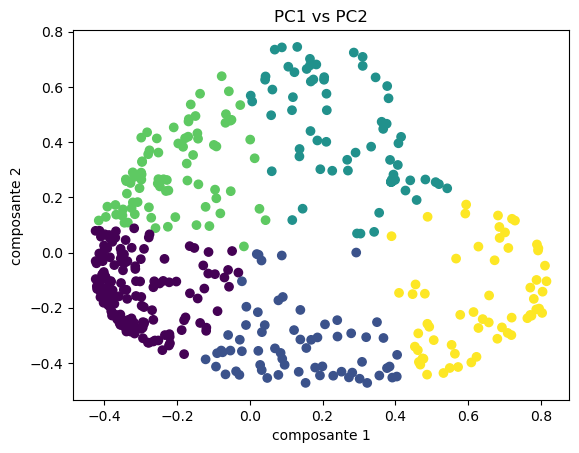

In [120]:
# Visualisation des clusters
plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1], c=clusters)
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("PC1 vs PC2")
plt.show()

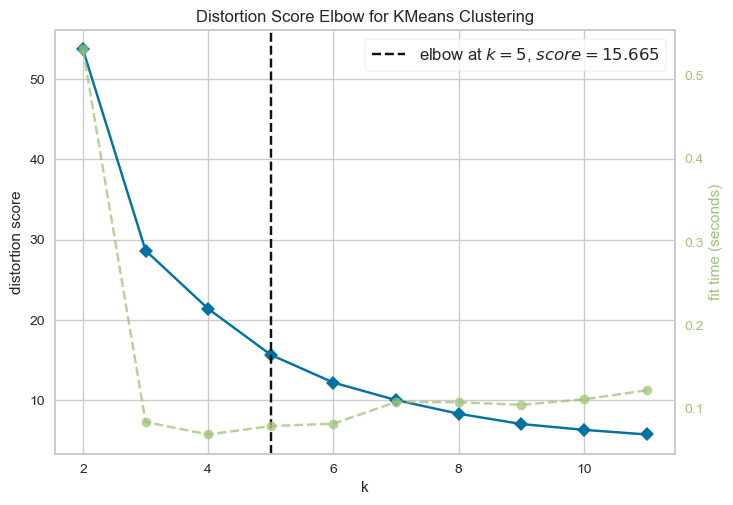

In [132]:
#  Methode du coude
kmeans= KMeans()

visualizer= KElbowVisualizer(kmeans, k=(2, 12))
visualizer.fit(res_kpca_rbf)
visualizer.show();

In [133]:
# Ajout des clusters à df et sauvegarder au format csv

df["cluster-kpca_rbf"]=clusters

df.to_csv("data_with_cluster.csv")

passons maintenant à l'analyse des résultats de segmentation

In [134]:
# Chargement des données
df=pd.read_csv("data_with_cluster.csv", index_col=0)

In [135]:
#  Cinq premières observations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_res_kpca_rbf,y_res_kpca_rbf,cluster-kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,1
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,1
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,2
3,Retail,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,2


In [136]:
df["cluster-kpca_rbf"].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [ ]:
Bien évidement on a 5 clusters

In [137]:
# Centroîdes
df.groupby("cluster-kpca_rbf")[features].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster-kpca_rbf,,,,,,
0,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830
1,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308
2,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
3,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481
4,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290


le centroîde permet de sortir les caractéristiques moyennes du groupe.

Donc si on remet ce tableau à l'équipe marketing ils s'auront analyser ces données et interpréte. Par exemple
groupe 0  a une consommation  en moyenne de milk de 2390.238994	.

In [ ]:
On peut aussi intégrer des variables qualitatives "Channel" et "Region"

In [138]:
df.groupby(["cluster-kpca_rbf","Channel","Region"])[features].mean()

Fresh          Milk       Grocery  \
cluster-kpca_rbf Channel Region                                             
0                Retail  Lisbon   6440.074074   2447.666667   2788.518519   
                         Other    6381.447368   2429.807018   2801.956140   
                         Porto    7676.944444   2053.500000   4373.833333   
1                Retail  Lisbon   2960.000000   7001.555556   8078.111111   
                         Other    5456.150943   6613.849057   9789.245283   
                         Porto    3295.666667   7600.333333   9534.000000   
2                Retail  Lisbon  27161.000000  12298.090909  13032.727273   
                         Other   31151.701754  11537.859649  12207.245614   
                         Porto   17038.000000   5968.400000  20295.600000   
3                Retail  Lisbon  16808.473684   1972.526316   2729.842105   
                         Other   17967.313725   2573.137255   3168.176471   
                         Porto   17039.636364   1979.818182   3843.454545   
4                Retail  Lisbon   3289.000000  10963.272727  20619.727273   
                         Other    6144.780488  11520.463415  19502.634146   
                         Porto    4402.300000  12776.000000  18218.700000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster-kpca_rbf Channel Region                                                
0                Retail  Lisbon   1997.777778        857.481481    649.111111  
                         Other    1620.236842        630.333333    897.578947  
                         Porto    1804.777778        847.555556    801.000000  
1                Retail  Lisbon   1268.444444       3544.222222    904.333333  
                         Other    1238.415094       3850.584906   1281.037736  
                         Porto     699.000000       4894.333333    601.000000  
2                Retail  Lisbon   6966.363636       4059.909091   3179.000000  
                         Other    7120.807018       4247.245614   3872.824561  
                         Porto   17905.000000       8766.400000   2599.800000  
3                Retail  Lisbon   3858.526316        444.526316   1212.105263  
                         Other    4256.549020        606.627451   1074.392157  
                         Porto    4963.727273        505.000000   1198.000000  
4                Retail  Lisbon   1429.818182       8725.545455   1878.454545  
                         Other    1394.609756       8327.804878   1618.195122  
                         Porto    1142.300000       9398.500000   1210.800000

on a fait une discretisation au niveau du canal "Channel" et la "Region".L' équipe marketing peut utiliser 
ces données pour concevoir sa campagne marketing, de manière à ce qu'elle soit performante, ainsi ils pourront mieux allouer leurs réssources marketing.

In [139]:
df.groupby(["cluster-kpca_rbf","Region"])[features].mean()

Fresh          Milk       Grocery  \
cluster-kpca_rbf Region                                             
0                Lisbon   6440.074074   2447.666667   2788.518519   
                 Other    6381.447368   2429.807018   2801.956140   
                 Porto    7676.944444   2053.500000   4373.833333   
1                Lisbon   2960.000000   7001.555556   8078.111111   
                 Other    5456.150943   6613.849057   9789.245283   
                 Porto    3295.666667   7600.333333   9534.000000   
2                Lisbon  27161.000000  12298.090909  13032.727273   
                 Other   31151.701754  11537.859649  12207.245614   
                 Porto   17038.000000   5968.400000  20295.600000   
3                Lisbon  16808.473684   1972.526316   2729.842105   
                 Other   17967.313725   2573.137255   3168.176471   
                 Porto   17039.636364   1979.818182   3843.454545   
4                Lisbon   3289.000000  10963.272727  20619.727273   
                 Other    6144.780488  11520.463415  19502.634146   
                 Porto    4402.300000  12776.000000  18218.700000   

                               Frozen  Detergents_Paper  Delicatessen  
cluster-kpca_rbf Region                                                
0                Lisbon   1997.777778        857.481481    649.111111  
                 Other    1620.236842        630.333333    897.578947  
                 Porto    1804.777778        847.555556    801.000000  
1                Lisbon   1268.444444       3544.222222    904.333333  
                 Other    1238.415094       3850.584906   1281.037736  
                 Porto     699.000000       4894.333333    601.000000  
2                Lisbon   6966.363636       4059.909091   3179.000000  
                 Other    7120.807018       4247.245614   3872.824561  
                 Porto   17905.000000       8766.400000   2599.800000  
3                Lisbon   3858.526316        444.526316   1212.105263  
                 Other    4256.549020        606.627451   1074.392157  
                 Porto    4963.727273        505.000000   1198.000000  
4                Lisbon   1429.818182       8725.545455   1878.454545  
                 Other    1394.609756       8327.804878   1618.195122  
                 Porto    1142.300000       9398.500000   1210.800000

Fin